# This notebook demonstrates how to do the first steps of any Analytics Engine (AE) activity: selecting data to import, and generating a dataset to work with. Then it demonstrates how to export that data.
## It starts with some imports

In [1]:
import xarray as xr
import panel as pn

pn.extension()

In [2]:
!pip install git+https://github.com/cal-adapt/climakitae.git@0.0.1

  Cloning https://github.com/cal-adapt/climakitae.git (to revision 0.0.1) to /tmp/pip-req-build-6xm1q0_6
  Running command git clone -q https://github.com/cal-adapt/climakitae.git /tmp/pip-req-build-6xm1q0_6
  Running command git checkout -q 7a5bcc0255da2b1c17bf8dd37782dc931171f8eb


In [3]:
import climakitae as ck

## First step using the *climakitae* (the python 'climate kit' library containing our AE tools): load a new application

In [5]:
app = ck.Application()

## Now we can call 'select' to display an interface from which to select the data to examine.
### This version only offers the dynamically-downscaled data produced at hourly intervals. As a result, if you select 'daily' for 'Timescale' it will result in a daily average of the hourly data. 

Future projections are so far available for three different greenhouse gas emissions scenarios (Shared Socioeconomic Pathways or SSPs) through 2100 from one General Circulation Model (GCM)  simulation, and for one SSP for another 3 GCMs. “Historical Climate” includes data from 1980-2014 simulated from GCMs used to produce the SSPs, which can be appended to a SSP time series using the option “Append historical.” Because this historical data is obtained through simulations, it represents average weather during the historical period but will not accurately capture historical phasing of variability in these variables.

“Historical Reconstruction” provides a reference downscaled reanalysis data based on atmospheric models fit to satellite and station observations, and as a result will reflect observed historical weather time series.


Column
    [0] Row
        [0] Column
            [0] Select(name='Timescale', options=OrderedDict([('hourly', ...]), value='hourly')
            [1] Select(name='Variable', options=OrderedDict([('Instantaneo...]), value='T2')
            [2] RadioButtonGroup(name='Resolution', options=OrderedDict([('45 km', ...]), value='45 km')
        [1] CheckBoxGroup(name='Scenario', options=OrderedDict([('Historical ...]))
    [1] Row
        [0] Column(margin=5, name='LocSelectorArea', width=300)
            [0] StaticText(value='<b>LocSelectorArea</b>')
            [1] Select(name='Area subset', options=OrderedDict([('none', ...]), value='none')
            [2] RangeSlider(end=67, name='Latitude', start=10, step=1, value=(41, 42), value_end=42, value_start=41)
            [3] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125, -115), value_end=-115, value_start=-125)
            [4] Select(name='Cached area', options=OrderedDict([('CA', ...]), value='CA')
        [1] ParamMethod(method)
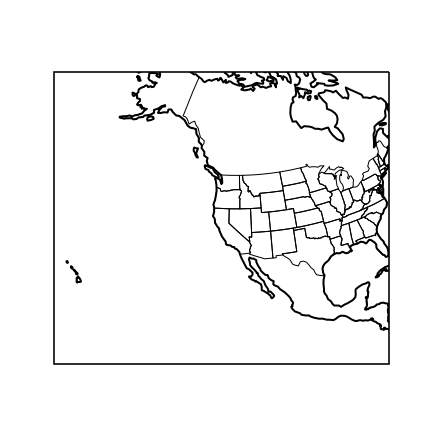

In [5]:
app.select()

## Finally, call app.retrieve() to load the subset/combo of data specified

In [ ]:
data_to_use = app.retrieve()

### You can preview the data in the retrieved, aggregated dataset when this is complete. It may take several minutes.

In [ ]:
data_to_use

## Now you can examine the data, and do anything else you like with it:

In [ ]:
# [insert your own code here]

#### You can load up another variable or resolution by modifying your selections and calling: next_data = app.retrieve()
##### If you do this a lot, and things are starting to get slow, you might want to try: data_to_use.close()

# Finally, export the data:

Use the below code to export a dataset as a NetCDF, GeoTIFF, or CSV file. Provide the name of the dataset in the environment to export as well as a character string containing the file name in quotations. If the dataset contains multiple variables, provide an argument specifying which variable to export (e.g. variable=”T2”). If you would like to save data as a GeoTIFF or CSV file and the dataset contains scenarios or simulations, additionally provide arguments specifying the scenario (scenario=”historical”) and the simulation (simulation=”cesm2”).

In [ ]:
app.export_as()

In [ ]:
app.export_dataset(data_to_use,'my_filename')